# Supervised Learning Model
## Classification - FracJob Success / Failure

### Import Libraries and Data
This code block imports and loads data

In [1]:
import pandas as pd

In [28]:
df = pd.read_csv('https://github.com/sunil-mnair/curriculum/raw/refs/heads/master/python/FracJobs_ADNOC_Classification.csv')

### Data Exploration

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25030 entries, 0 to 25029
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   JobID                  25030 non-null  object 
 1   Frac_Outcome           25030 non-null  int64  
 2   ProppantType           25030 non-null  object 
 3   ProppantVolume_ton     25030 non-null  float64
 4   FluidType              25030 non-null  object 
 5   PadVolume_m3           25030 non-null  float64
 6   ReservoirDepth_m       25030 non-null  float64
 7   Porosity_frac          24868 non-null  float64
 8   Permeability_mD        24794 non-null  float64
 9   LateralLength_m        25030 non-null  float64
 10  PumpingRate_bpm        25030 non-null  float64
 11  InjectionPressure_psi  25030 non-null  int64  
 12  StageCount             25030 non-null  int64  
 13  SlurryRate_bpm         25030 non-null  float64
 14  WellAge_years          25030 non-null  float64
 15  Pr

## Data Cleaning
- Remove Duplicates
- Null Value Treatment
- Remove Unwanted Columns
- Encoding Categorical Columns
- Identify and Remove Outliers

### Null Value Treatment

In [30]:
df.isnull().sum()

,0
JobID,0
Frac_Outcome,0
ProppantType,0
ProppantVolume_ton,0
FluidType,0
PadVolume_m3,0
ReservoirDepth_m,0
Porosity_frac,162
Permeability_mD,236
LateralLength_m,0


<Axes: >

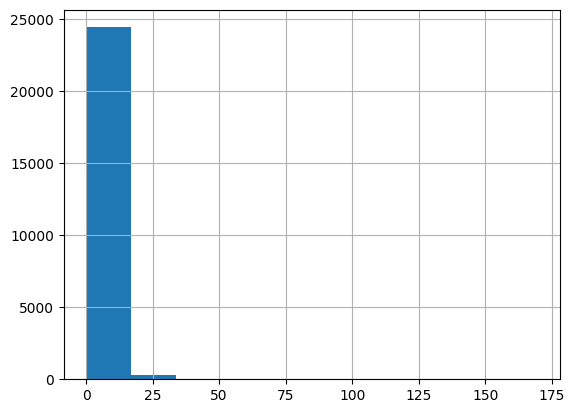

In [31]:
df.Permeability_mD.hist()

In [32]:
df.Permeability_mD.mean()

np.float64(3.2196802452206184)

In [33]:
df.Porosity_frac.median()

0.1393

In [34]:
df['Porosity_frac'].fillna(df['Porosity_frac'].mean(), inplace=True)

/tmp/ipython-input-2851566203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Porosity_frac'].fillna(df['Porosity_frac'].mean(), inplace=True)


In [35]:
df['Permeability_mD'].fillna(df['Permeability_mD'].mean(), inplace=True)

/tmp/ipython-input-299493826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Permeability_mD'].fillna(df['Permeability_mD'].mean(), inplace=True)


### Remove Unwanted Columns

In [36]:
df.columns

Index(['JobID', 'Frac_Outcome', 'ProppantType', 'ProppantVolume_ton',
       'FluidType', 'PadVolume_m3', 'ReservoirDepth_m', 'Porosity_frac',
       'Permeability_mD', 'LateralLength_m', 'PumpingRate_bpm',
       'InjectionPressure_psi', 'StageCount', 'SlurryRate_bpm',
       'WellAge_years', 'PreviousStimulations', 'FormationType',
       'Frac_Success_Prob'],
      dtype='object')

In [37]:
df.drop(columns=['JobID','Frac_Success_Prob'], inplace=True)

### Encode Categorical Columns

In [38]:
categ_cols = list(df.select_dtypes(include='object').columns)

In [39]:
categ_cols

['ProppantType', 'FluidType', 'FormationType']

In [40]:
df.ProppantType.value_counts()

,count
ProppantType,
White Sand,8816
Brown Sand,7525
Resin-Coated Sand,4980
Ceramic,3709


In [41]:
df.FluidType.value_counts()

,count
FluidType,
Slickwater,12488
Crosslinked Gel,7583
Hybrid,4959


In [42]:
df.FormationType.value_counts()

,count
FormationType,
Sandstone,9844
Carbonate,8802
Shale,6384


In [43]:
df= pd.get_dummies(df,columns=categ_cols)

In [44]:
df.columns

Index(['Frac_Outcome', 'ProppantVolume_ton', 'PadVolume_m3',
       'ReservoirDepth_m', 'Porosity_frac', 'Permeability_mD',
       'LateralLength_m', 'PumpingRate_bpm', 'InjectionPressure_psi',
       'StageCount', 'SlurryRate_bpm', 'WellAge_years', 'PreviousStimulations',
       'ProppantType_Brown Sand', 'ProppantType_Ceramic',
       'ProppantType_Resin-Coated Sand', 'ProppantType_White Sand',
       'FluidType_Crosslinked Gel', 'FluidType_Hybrid', 'FluidType_Slickwater',
       'FormationType_Carbonate', 'FormationType_Sandstone',
       'FormationType_Shale'],
      dtype='object')

In [45]:
df.sample()

,Frac_Outcome,ProppantVolume_ton,PadVolume_m3,ReservoirDepth_m,Porosity_frac,Permeability_mD,LateralLength_m,PumpingRate_bpm,InjectionPressure_psi,StageCount,...,ProppantType_Brown Sand,ProppantType_Ceramic,ProppantType_Resin-Coated Sand,ProppantType_White Sand,FluidType_Crosslinked Gel,FluidType_Hybrid,FluidType_Slickwater,FormationType_Carbonate,FormationType_Sandstone,FormationType_Shale
23131,1,617.8,677.9,2977.8,0.1598,4.617,2554.9,58.7,4066,34,...,True,False,False,False,False,False,True,True,False,False


In [46]:
num_cols = list(df.select_dtypes(include=['bool','int64','float64']).columns)
num_cols

['Frac_Outcome',
 'ProppantVolume_ton',
 'PadVolume_m3',
 'ReservoirDepth_m',
 'Porosity_frac',
 'Permeability_mD',
 'LateralLength_m',
 'PumpingRate_bpm',
 'InjectionPressure_psi',
 'StageCount',
 'SlurryRate_bpm',
 'WellAge_years',
 'PreviousStimulations',
 'ProppantType_Brown Sand',
 'ProppantType_Ceramic',
 'ProppantType_Resin-Coated Sand',
 'ProppantType_White Sand',
 'FluidType_Crosslinked Gel',
 'FluidType_Hybrid',
 'FluidType_Slickwater',
 'FormationType_Carbonate',
 'FormationType_Sandstone',
 'FormationType_Shale']

In [47]:
df[num_cols].corr()

,Frac_Outcome,ProppantVolume_ton,PadVolume_m3,ReservoirDepth_m,Porosity_frac,Permeability_mD,LateralLength_m,PumpingRate_bpm,InjectionPressure_psi,StageCount,...,ProppantType_Brown Sand,ProppantType_Ceramic,ProppantType_Resin-Coated Sand,ProppantType_White Sand,FluidType_Crosslinked Gel,FluidType_Hybrid,FluidType_Slickwater,FormationType_Carbonate,FormationType_Sandstone,FormationType_Shale
Frac_Outcome,1.000000,0.313031,0.262624,-0.040543,0.262108,0.141996,0.329248,0.162967,-0.051392,0.317857,...,-0.030027,0.032499,0.022438,-0.014101,-0.021467,0.014370,0.008274,-0.005769,0.038215,-0.036505
ProppantVolume_ton,0.313031,1.000000,0.605614,0.003943,-0.003318,0.002086,0.858169,-0.002698,0.007392,0.798211,...,0.001669,-0.004777,0.004884,-0.002131,-0.003208,0.002679,0.000813,-0.007312,0.007959,-0.000910
PadVolume_m3,0.262624,0.605614,1.000000,-0.003010,0.001512,0.005132,0.702504,-0.003421,-0.002225,0.758553,...,0.004638,-0.007735,0.006523,-0.004151,-0.005535,0.012307,-0.004724,-0.001380,-0.001524,0.003220
ReservoirDepth_m,-0.040543,0.003943,-0.003010,1.000000,-0.011058,0.008128,-0.000146,0.000812,0.781787,0.000972,...,-0.002988,0.004732,-0.000242,-0.000449,0.017528,-0.007718,-0.009957,0.001234,-0.001459,0.000283
Porosity_frac,0.262108,-0.003318,0.001512,-0.011058,1.000000,-0.004632,-0.000097,0.000239,-0.010184,-0.000394,...,-0.001694,-0.009567,0.000167,0.008603,-0.003588,0.006044,-0.001521,-0.000337,0.005550,-0.005850
Permeability_mD,0.141996,0.002086,0.005132,0.008128,-0.004632,1.000000,0.002813,-0.006838,0.020982,0.004380,...,0.012409,-0.006726,0.001608,-0.008254,0.002421,-0.004547,0.001399,-0.000539,-0.003436,0.004441
LateralLength_m,0.329248,0.858169,0.702504,-0.000146,-0.000097,0.002813,1.000000,-0.000557,0.003940,0.927723,...,0.000412,-0.003617,0.005074,-0.001946,-0.004825,0.004975,0.000468,-0.005804,0.006668,-0.001115
PumpingRate_bpm,0.162967,-0.002698,-0.003421,0.000812,0.000239,-0.006838,-0.000557,1.000000,-0.003593,-0.001587,...,0.000193,-0.001048,-0.014265,0.012516,0.010012,-0.009022,-0.002010,0.010688,0.001953,-0.013897
InjectionPressure_psi,-0.051392,0.007392,-0.002225,0.781787,-0.010184,0.020982,0.003940,-0.003593,1.000000,0.004468,...,-0.008768,0.014190,0.000901,-0.002890,0.019836,-0.012142,-0.008552,-0.003206,0.000087,0.003414
StageCount,0.317857,0.798211,0.758553,0.000972,-0.000394,0.004380,0.927723,-0.001587,0.004468,1.000000,...,-0.002382,-0.002943,0.003528,0.001527,-0.005161,0.005323,0.000500,-0.005126,0.005262,-0.000282


### Remove Outliers

In [48]:
from scipy import stats
import numpy as np

cols = list(df.select_dtypes(include=['int64','float64']))

df_zscore = np.abs(df[cols].apply(stats.zscore))

In [49]:
df_zscore

,Frac_Outcome,ProppantVolume_ton,PadVolume_m3,ReservoirDepth_m,Porosity_frac,Permeability_mD,LateralLength_m,PumpingRate_bpm,InjectionPressure_psi,StageCount,SlurryRate_bpm,WellAge_years,PreviousStimulations
0,0.687279,0.557726,0.634844,1.640134,0.463126,0.586066,0.365410,0.764183,2.310758,0.903213,0.867221,0.654495,0.547475
1,1.455012,0.261750,0.395410,0.190703,1.111315,0.676920,0.285876,0.159045,0.099652,0.026743,0.521468,0.203961,1.257729
2,0.687279,0.795858,0.160489,0.052328,0.159563,0.169471,0.469742,1.626112,0.212819,0.996209,1.777327,0.771104,0.547475
3,0.687279,0.822150,0.976891,0.926532,1.549034,0.571281,0.516999,0.698234,1.499729,0.345239,0.693343,0.617393,1.257729
4,0.687279,1.729607,0.902479,0.576917,0.728908,2.514667,1.831052,1.318892,0.420291,1.554183,1.241009,0.304878,0.547475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,1.455012,1.678525,1.643905,0.744371,0.615189,0.493065,2.133066,0.244381,1.086234,2.391144,0.082267,1.629770,0.547475
25026,0.687279,1.650821,1.275871,0.266074,0.703783,0.448949,0.578572,0.274637,0.606916,0.770709,0.207419,0.394985,1.257729
25027,0.687279,0.501385,0.175113,0.095445,0.207657,1.003290,0.591718,0.824696,1.061034,0.956700,0.614914,1.274643,0.547475
25028,1.455012,1.337478,1.411522,0.849490,0.407626,0.085293,1.460814,1.091574,0.019855,0.624226,0.870892,1.629770,1.257729


In [50]:
outliers = list(df_zscore[df_zscore > 2].dropna(thresh=2).index)
len(outliers)

2966

In [51]:
df.drop(df.index[outliers],inplace=True)

In [52]:
df.shape

(22064, 23)

## Variable Selection

<Axes: >

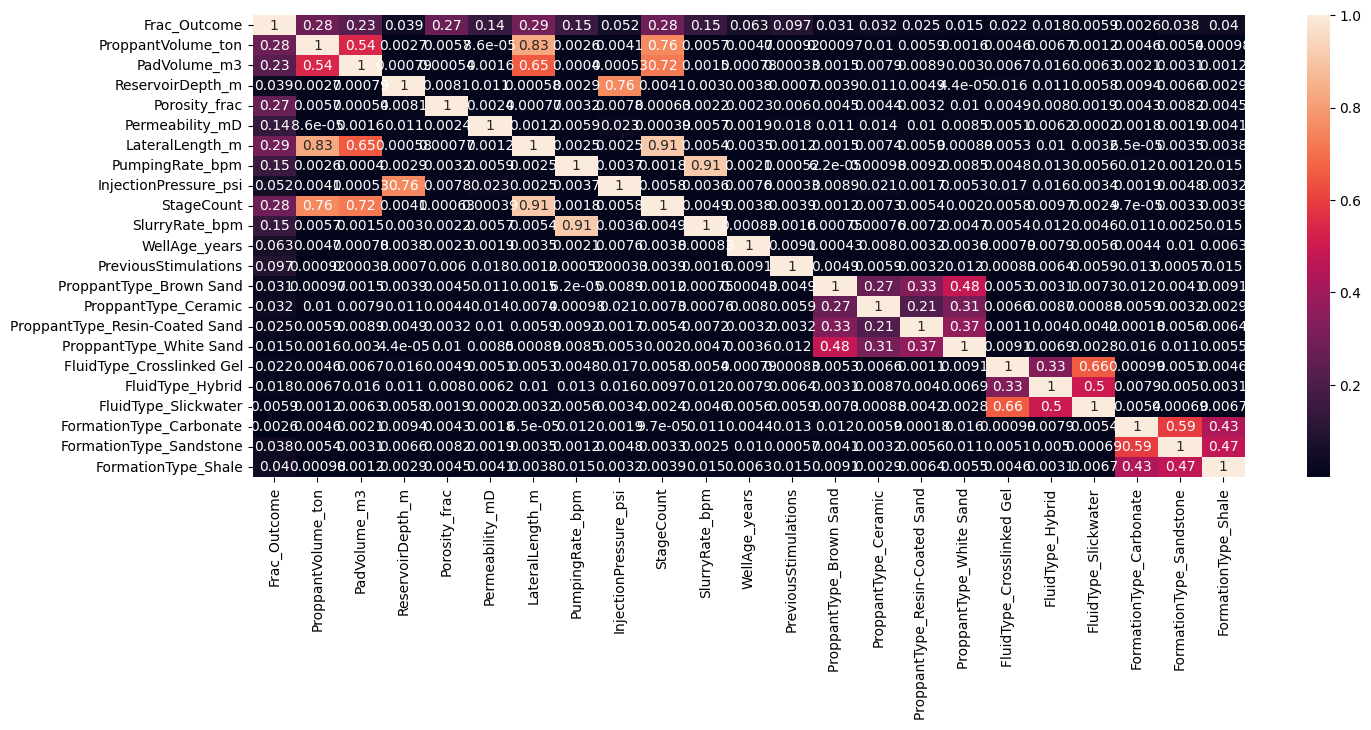

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6)) # Width and Height in Inches
sns.heatmap(df.corr().abs(),xticklabels = df.corr().abs().columns, yticklabels=df.corr().abs().columns, annot=True)

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [65]:
cols = list(df.select_dtypes(include=['bool','int64','float64']).columns)

In [66]:
dep = df['Frac_Outcome']
ind = df[cols[1:]]

In [67]:
ind.head()

,ProppantVolume_ton,PadVolume_m3,ReservoirDepth_m,Porosity_frac,Permeability_mD,LateralLength_m,PumpingRate_bpm,InjectionPressure_psi,StageCount,SlurryRate_bpm,...,ProppantType_Brown Sand,ProppantType_Ceramic,ProppantType_Resin-Coated Sand,ProppantType_White Sand,FluidType_Crosslinked Gel,FluidType_Hybrid,FluidType_Slickwater,FormationType_Carbonate,FormationType_Sandstone,FormationType_Shale
0,343.8,691.9,2024.1,0.1580,0.762,1980.5,52.7,3144,27,54.4,...,False,False,False,True,False,False,True,True,False,False
1,383.2,776.8,2891.4,0.0958,0.381,2371.9,46.7,4668,37,50.7,...,False,False,False,True,False,True,False,True,False,False
2,312.1,860.1,2974.2,0.1334,2.509,1917.8,29.0,4590,26,26.1,...,True,False,False,False,False,True,False,True,False,False
3,308.6,1263.4,2451.1,0.2009,0.824,1889.4,38.2,3703,33,37.7,...,False,True,False,False,False,False,True,True,False,False
4,187.8,597.0,2660.3,0.1685,13.765,1099.7,58.2,4447,20,58.4,...,True,False,False,False,False,True,False,False,False,True


In [70]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(ind, dep)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [71]:
print(f"Num Features: {fit.n_features_}")
print(f"Feature Ranking: {fit.ranking_}")

Num Features: 5
Feature Ranking: [13 17 18  1  5 16 14 15 11 12  8  1  1 10  9  1  2  4  3  6  7  1]


In [72]:
ranking = pd.Series(fit.ranking_)

ranked_cols= list(ranking.where(ranking==1).dropna().index)
selected_cols = list(ind.iloc[:,ranked_cols].columns)

print("Selected Columns")
print("-" * 30)
for c in selected_cols:
    print(c)

Selected Columns
------------------------------
Porosity_frac
PreviousStimulations
ProppantType_Brown Sand
ProppantType_White Sand
FormationType_Shale


## Training and Testing Data

In [73]:
# Horizontal Split
X = df[selected_cols] # independent
y = df['Frac_Outcome'] # dependent

In [91]:
# Vertical Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the Training Model

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Apply Model on Test Data

In [93]:
y_predict = model.predict(X_test)
y_predict

array([1, 1, 1, ..., 0, 1, 1])

### Model Accuracy

In [94]:
model.score(X_test,y_test)

0.6920462270564242

## Model Evaluation

In [95]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[ 192 1201]
 [ 158 2862]]


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.14      0.22      1393
           1       0.70      0.95      0.81      3020

    accuracy                           0.69      4413
   macro avg       0.63      0.54      0.51      4413
weighted avg       0.66      0.69      0.62      4413



## Decision Tree

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=100)
print(dt.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [100]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=100)

In [101]:
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6909132109675957

## Saving the Model - Pickling the Model

In [102]:
import pickle # wb - refers to writing as binary
with open("algorithm.pkl","wb") as file:
  pickle.dump(model,file)

## Apply Model on Test Data

In [103]:
test = pd.read_csv('https://github.com/sunil-mnair/curriculum/raw/refs/heads/master/python/FracJobs_ADNOC_Sample.csv')

In [104]:
test.head()

,JobID,Frac_Outcome,ProppantType,ProppantVolume_ton,FluidType,PadVolume_m3,ReservoirDepth_m,Porosity_frac,Permeability_mD,LateralLength_m,PumpingRate_bpm,InjectionPressure_psi,StageCount,SlurryRate_bpm,WellAge_years,PreviousStimulations,FormationType,Frac_Success_Prob
0,JOB-0000566,1,White Sand,319.6,Hybrid,483.3,3067.8,0.1456,3.897,2173.3,36.1,5544,35,41.0,1.69,0,Shale,0.6451
1,JOB-0000691,1,White Sand,373.4,Slickwater,652.9,3501.4,0.1161,1.058,1632.2,42.2,5749,25,44.9,4.87,0,Carbonate,0.2806
2,JOB-0000637,1,Brown Sand,623.6,Hybrid,1366.0,3011.9,0.1723,9.511,2834.8,44.2,5071,51,46.0,2.08,1,Carbonate,0.9791
3,JOB-0000044,1,Brown Sand,366.7,Crosslinked Gel,437.0,1659.0,0.1092,3.139,1967.2,22.4,3512,31,14.5,1.44,0,Carbonate,0.1694
4,JOB-0000721,1,Brown Sand,326.3,Slickwater,715.3,2948.1,0.1234,3.512,1764.2,36.3,4276,31,36.1,2.13,0,Sandstone,0.4289


In [105]:
df_test = test.copy()

In [ ]:
df_test.drop(columns=['JobID','Frac_Outcome','Frac_Success_Prob'], inplace=True)

## Test Data Pre-Processing
- Null Value Treatment
- Encoding
- Outlier Treatment
- Remove Unwanted Cols

### Null Value Treatment

In [107]:
df_test['Porosity_frac'].fillna(df_test['Porosity_frac'].mean(), inplace=True)
df_test['Permeability_mD'].fillna(df_test['Permeability_mD'].mean(), inplace=True)

/tmp/ipython-input-1279576162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Porosity_frac'].fillna(df_test['Porosity_frac'].mean(), inplace=True)
/tmp/ipython-input-1279576162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

## Encoding

In [108]:
df_test= pd.get_dummies(df_test,columns=categ_cols)

### Remove Outliers

In [109]:
df_zscore = np.abs(df_test[cols].apply(stats.zscore))
outliers = list(df_zscore[df_zscore > 2].dropna(thresh=2).index)
df_test.drop(df_test.index[outliers],inplace=True)



### Select Variables

In [110]:
X = df_test[selected_cols]

In [111]:
X.head()

,Porosity_frac,PreviousStimulations,ProppantType_Brown Sand,ProppantType_White Sand,FormationType_Shale
0,0.1456,0,False,True,True
1,0.1161,0,False,True,False
2,0.1723,1,True,False,False
4,0.1234,0,True,False,False
5,0.1196,1,True,False,False
